# Molecule Mayhem

It's time to play with chemistry! In this problem, we're going to generate a random set of N 3-atom candidate "molecules." Some of these might be real molecules. More likely, our randomly generated molecules will not be allowed solutions. (There are rules about which atoms can bond together and in what order.) Our goal will be to make as many allowed molecules as possible, by making small changes to the existing candidate in each iteration. (Don't worry. We'll let you know what the allowed molecules look like.) 

We'll also make sure to follow the law of <a href="https://en.wikipedia.org/wiki/Conservation_of_mass">conservation of mass</a> (we can't create new atoms or destroy existing ones). 

Let's start by setting up our randomly generated data. We'll walk you through it step by step. Be sure to read the comments.

### Note 
We're using examples of list comprehensions and of list multiplication in this code. If you need a refresher on list comprehensions, this is a great resource: https://realpython.com/list-comprehension-python/ If you need a refresher on list multiplication, check out this: https://thehelloworldprogram.com/python/python-list-operations/

In [69]:
#do some imports.
import random
import numpy as np
import copy

#set random seeds to make this reproducible
random.seed(3)
np.random.seed(3)

#These are the possible atoms (Carbon, Oxygen, Nitrogen, Hydrogen)
atoms = ['O','N','H','C']

#N is the total number of molecules we'll be working with
N = 3 #can be as many as you want - the higher the number, the harder the problem is to solve. Start small.

#K is the number of "spares" of each atom we'll have
K = 2

#This is the length of each molecule
L = 3 #can be 2 or 3

#Let's generate our list of candidate molecules
candidates = [] #start with an empty list
for i in range(N):
    #use a list comprehension to generate a 2-atom molecule, picking a random atom from the list of atom, 3 times
    thisMolecule = [atoms[np.random.randint(len(atoms))] for i in range(L)]
    #append this molecule to the candidate molecules
    candidates.append(thisMolecule)
#review what we've got
print('Candidate molecules', candidates)

#create a list of spare atoms, using K to determine how many of each atom to include
spare_atoms = [a for a in atoms] * K
print('Spare Atoms', spare_atoms)

Candidate molecules [['H', 'O', 'N'], ['C', 'O', 'O'], ['O', 'N', 'N']]
Spare Atoms ['O', 'N', 'H', 'C', 'O', 'N', 'H', 'C']


### Wrapping Set up in a function

Let's wrap the set up stuff in a function for later use.

In [100]:
def setUpMoleculeProblem(atoms, N, K, L):
    #Let's generate our list of candidate molecules
    candidates = [] #start with an empty list
    for i in range(N):
        #use a list comprehension to generate a 3-atom molecule, picking a random atom from the list of atom, 3 times
        thisMolecule = [atoms[np.random.randint(len(atoms))] for i in range(L)]
        #append this molecule to the candidate molecules
        candidates.append(thisMolecule)
    #create a list of spare atoms, using K to determine how many of each atom to include
    spare_atoms = [a for a in atoms] * K
    
    return(spare_atoms, candidates)

setupAtoms, setupMolecules = setUpMoleculeProblem(atoms, 3, 2, L)
print("Our spare atoms are:", setupAtoms)
print("Our candidate molecules are: ", setupMolecules)


Our spare atoms are: ['O', 'N', 'H', 'C', 'O', 'N', 'H', 'C']
Our candidate molecules are:  [['N', 'C', 'O'], ['H', 'O', 'N'], ['C', 'H', 'H']]


## Possible Molecules

There are hundreds of possible molecules, but we're only going to focus on a few: 
### Two-atom molecules
* NO (Nitric Oxide
* NN (Nitrogen)
* OO (Oxygen)
* HH (Hydrogen)

### Three-atom molecules
* NOH (dihydrogen phosphate)
* HNO (Nitroxyl), COO (Carbon Dioxide)
* HHO (Water)
* HCN (Hydrogen cyanide). 

Let's set up our list of allowed molecules.

In [95]:
all_allowed_molecules = { 2: [['N','O'], ['N','N'],['O','O'],['H','H']],
    3: [['N','O','H'], ['H','N','O'],['C','O','O'],['H','H','O'],['H','C','N'], ['N','N','0']]}
allowed_molecules = all_allowed_molecules[L]
allowed_molecules

[['N', 'O', 'H'],
 ['H', 'N', 'O'],
 ['C', 'O', 'O'],
 ['H', 'H', 'O'],
 ['H', 'C', 'N'],
 ['N', 'N', '0']]

Note that we're using a list of lists to store both our candidate molecules and our allowed molecules. When it's time to determine if our candidate molecules are allowed molecules, we can simple look for a sublist item from the candidate molecules and check to see if it's "IN" our allowed molecules. Clear as mud? Let's look at some examples:

In [ ]:
#check to see if ['H', 'N', 'O'] is one of our allowed molecules

print(['H', 'N', 'O'] in allowed_molecules)

#check to see if ['H', 'O', 'O'] is one of our allowed molecules

print(['H', 'O', 'O'] in allowed_molecules)

#check to see if any of our candidate molecules are allowed molecules
for m in candidates:
    print(m, "is an allowed molecule:", m in allowed_molecules)

## Making Changes
There are 2 ways we can make changes to existing candidate molecules. 

1. We can change the order of two atoms in an individual molecule.
2. We can swap an atom between our spare atoms list and a molecule.

Let's take a look at some code to do each of these things.

### Swapping the order of two atoms in a single molecule
Run the code in the next cell multiple times, and you can watch how the molecule changes.

In [72]:
#first, let's see how to just swap two items in a list, with hardcoding the items
#set up a list
l = [0, 1, 2, 3, 4]
print('Simple list swap, before', l)

#swap elements in the list
l[0], l[3] = l[3], l[0]
print('Simple list swap, after = ', l)


#Remember, our candidates is a list of lists, and the outer list is of length N.
#let's copy our list so we're working with a new list we need to use deep copy here to copy the inner and outer list
candidates_copy = copy.deepcopy(candidates)

#we need a random number between 0 and N to decide which molecule to tweak
r = np.random.randint(N)
#see which molecule we're messing with:
print('We will perturb this molecule', candidates_copy[r])

#we need 2 random numbers between 0 and 2 to choose the positions to swap. 
#They should be unique so that we're actually swapping positions
#this gets the numbers between 0 and L (our molecule length)
a = np.arange(L)
#this randomly shuffles them
np.random.shuffle(a)
#this gets the first 2 of those numbers
a_pos = a[:2]
#swap elements in our molecule
candidates_copy[r][a_pos[0]], candidates_copy[r][a_pos[1]] = candidates_copy[r][a_pos[1]], candidates_copy[r][a_pos[0]]
print('It now looks like this: ', candidates_copy[r])

Simple list swap, before [0, 1, 2, 3, 4]
Simple list swap, after =  [3, 1, 2, 0, 4]
We will perturb this molecule ['H', 'O', 'N']
It now looks like this:  ['H', 'N', 'O']


### Swapping in a Spare Atom
Run the code in this cell multiple times and you can watch how our spare atoms list and our molecule changes.

In [73]:
#we're still using the same candidates_copy and random number (make sure you ran the previously cell before this one.)
print('We will swap an atom in this molecule', candidates_copy[r])

#we need a copy of our spare_atoms, too
spare_atoms_copy = copy.deepcopy(spare_atoms)
print('These are our spare atoms', spare_atoms_copy)

#we need a random number between 0 and the length of our spare atoms list
spare_index = np.random.randint(len(spare_atoms_copy))
print('We will grab atom ', spare_index)
#we can use pop to get the spare atom. This removes it from the list (which is what we want)
spare_atom = spare_atoms_copy.pop(spare_index)
print('Our spare atom is ', spare_atom)
#we need a random number between 0 and L to determine which atom in our molecule we will swap
swap_index = np.random.randint(L)
print('We will swap the molecule at position ', swap_index)
#we need to fetch the atom we'll be adding back to the spares.
replace_atom = candidates_copy[r][swap_index]
print('We will replace the ', replace_atom, 'with', spare_atom, 'in the molecule.')
print('We will replace the ', spare_atom, 'with', replace_atom, 'in the spares list.')
#let's replace the molecule's atom with our spare
candidates_copy[r][swap_index] = spare_atom
#let's add our replaced atom back to our spares list
spare_atoms_copy.append(replace_atom)
print('Our new molecule is ', candidates_copy[r])
print('Our spares list is now', spare_atoms_copy)


We will swap an atom in this molecule ['H', 'N', 'O']
These are our spare atoms ['O', 'N', 'H', 'C', 'O', 'N', 'H', 'C']
We will grab atom  5
Our spare atom is  N
We will swap the molecule at position  2
We will replace the  O with N in the molecule.
We will replace the  N with O in the spares list.
Our new molecule is  ['H', 'N', 'N']
Our spares list is now ['O', 'N', 'H', 'C', 'O', 'H', 'C', 'O']


### Deciding the Swap Method
We have a rule that approximately 50% of the time we'll swap atoms within the molecule and 50% of the time we'll swap atoms between a molecule and our spares list. We can use probability to help us decide when we'll do each. See this example code for using probability to make a decision.

Run the code below several times and make sure you understand what is happening.


In [ ]:
#first we'll generate a random number between 0 and 1
prob = np.random.uniform(low=0.0, high=1.0, size=1)
print('The random number is ', prob)
#if the random number is less than .5, we'll use the within molecule method. If it is .5 or more, we'll use the spares method
if prob < .5:
    print('We would use the within molecule method.')
else:
    print('We would use the spares method.')

### Putting the swap together into a function

Let's put all of the swap stuff together into a function, for ease of use. Remember, when you create a function, you should't be relying on variables that are in the global scope. We should pass in all the variables we need, so that we're sure we're using the right version of the variables.

We'll call our function perturbMolecules. To do everything we need to do, we need the following variables passed in:
* The list of spare atoms.
* The list of candidate molecules.

That's it! We can get a version of the N variable within our function.

We want our function to return the same things we passed in.

In [96]:
#create a function that takes in the list of spare atoms and the list of candidate molecules and performs a swap.
def perturbMolecules(atoms, molecules):
    #make a copy of the molecules
    molecules_copy = copy.deepcopy(molecules)
    #make a copy of the atoms
    spare_atoms_copy = copy.deepcopy(atoms)
    #L is our number of atoms per molecule, we'll get it dynamically from our first molecule in the list
    L = len(molecules_copy[0])
    #we need the length of the molecules list
    N = len(molecules_copy)
    #we need a random number between 0 and N to decide which molecule to tweak
    r = np.random.randint(N)
    
    #get our probability
    prob = np.random.uniform(low=0.0, high=1.0, size=1)
    #determine if we're swapping within molecules or using the spares method
    if prob < .5:
        #SWAPPING WITHIN MOLECULES        
        #we need 2 random numbers between 0 and 1 to choose the positions to swap. 
        #They should be unique so that we're actually swapping positions
        #this gets the 2 numbers between 0 and 1
        a = np.arange(L)
        #this randomly shuffles them
        np.random.shuffle(a)
        #this gets the first 2 of those numbers
        a_pos = a[:2]
        #swap elements in our molecule
        molecules_copy[r][a_pos[0]], molecules_copy[r][a_pos[1]] = molecules_copy[r][a_pos[1]], molecules_copy[r][a_pos[0]]
    else:
        #USING THE SPARES METHOD
        #we need a random number between 0 and the length of our spare atoms list
        spare_index = np.random.randint(len(spare_atoms_copy))
        #we can use pop to get the spare atom. This removes it from the list (which is what we want)
        spare_atom = spare_atoms_copy.pop(spare_index)
        #we need a random number between 0 and L to determine which atom in our molecule we will swap
        swap_index = np.random.randint(L)
        #we need to fetch the atom we'll be adding back to the spares.
        replace_atom = molecules_copy[r][swap_index]
        #let's replace the molecule's atom with our spare
        molecules_copy[r][swap_index] = spare_atom
        #let's add our replaced atom back to our spares list
        spare_atoms_copy.append(replace_atom)
    
    #RETURN OUR RESULTS
    return (spare_atoms_copy, molecules_copy)


#reminder what we're working with before we swap
print('Our current molecules', candidates, '\n and our current atoms', spare_atoms)
#call the function
new_atoms, new_molecules = perturbMolecules(spare_atoms, candidates)

#see what we have after the swap
print('Our new molecules', new_molecules, '\n and our new atoms', new_atoms)



Our current molecules [['H', 'O', 'N'], ['C', 'O', 'O'], ['O', 'N', 'N']] 
 and our current atoms ['O', 'N', 'H', 'C', 'O', 'N', 'H', 'C']
Our new molecules [['H', 'O', 'N'], ['C', 'O', 'O'], ['O', 'N', 'N']] 
 and our new atoms ['O', 'N', 'H', 'O', 'N', 'H', 'C', 'C']


## Evaluating our candidates
Our goal is to get a list of all allowed molecules. Remember we've already given you an example of checking if the molecules are allowed. Now we'll combine that with updating a variable of the total number of allowed molecules we've created. Let's put it in a function right away. We'll cal this one assessMolecules. Remember, we need to pass in everything we need. So for this one, we need:
* our candidate molecules
* our allowed molecules

Run this code multiple times.

In [97]:
#create a function to assess the candidate molecules. 
#Returns a "score" - the total number of molecules that are allowed

def assessMolecules(molecules, allowed):
    #set a variable to track the number of molecules that are allowed
    total_allowed = 0
    #loop through the candidates and tally
    for m in molecules:
        if m in allowed:
            total_allowed += 1
    return total_allowed    

#call it with our original set:
before = assessMolecules(candidates, allowed_molecules)
#perturb
new_atoms, new_molecules = perturbMolecules(spare_atoms, candidates)
#call it on our perturbed set
after = assessMolecules(new_molecules, allowed_molecules)

print('Before we had', before, 'allowed molecules in ', candidates)
print('After we had', after, 'allowed molecules in', new_molecules)

Before we had 1 allowed molecules in  [['H', 'O', 'N'], ['C', 'O', 'O'], ['O', 'N', 'N']]
After we had 0 allowed molecules in [['H', 'O', 'N'], ['O', 'O', 'O'], ['O', 'N', 'N']]


### Keeping or tossing our pertubed candidates
When would we want to keep our perturbed candidate molecules and when would we want to toss them and stick with the original set? Well, we'd only want to keep them when we found more allowed molecules than we originally had!


## Simulated Annealing - By Hand Approach
Let's see what this would look like when we put it all together in a home grown simulated annealing method.

Do this problem initially with a low number of molecules in the setUpMoleculeProblem. Try this:

<code>current_atoms, current_molecules = setUpMoleculeProblem(atoms, 3, 2, 3)</code>

You should fairly consistently be able to get all 3 molecules into an approved state. If you bump up to 20 molecules:

<code>current_atoms, current_molecules = setUpMoleculeProblem(atoms, 20, 2, 3)</code>

You'll find that you won't get a perfect result consistently. What could you tweak to improve your results? Would altering the size of your spare atoms pool help? What about changing your starting temp? What about increasing the max_moves_no_improve? Try tweaking things and seeing if you can get all 20 molecules to be in approved state.

In [111]:
#get our current atoms and current molecules 
current_atoms, current_molecules = setUpMoleculeProblem(atoms, 20, 2, 3)
#get our current total allowed molecules
current_score = assessMolecules(current_molecules, allowed_molecules)
#at the start, our best set of candidate molecules is the starting set of candidate molecules
best_molecules = current_molecules
#track our best score, which before start is the same as our current score
best_score = current_score

temp = 150  # choose an initial temperature. This is a bit of a crap shoot with this problem. Play with it.
alpha = 0.99
iteration = 1
print('Starting Score {:d} and Starting Temp {:d}\n'.format(
    current_score, temp))
#print('New | Current | Delta | Best | Accept |  Prob  | Temp')

# these two variables just save info for plotting but aren't 
# essential for the algorithm
trajectory = [[iteration,current_score]]
trajectory_best = [[iteration,best_score]]

max_moves_no_improve = 1000
num_moves_no_improve = 0
iteration = 0


while (num_moves_no_improve < max_moves_no_improve):
    #Testing
    #print('Current molecules:', current_molecules)
    
    num_moves_no_improve += 1
    #perturb the molecules
    new_atoms, new_molecules = perturbMolecules(current_atoms, current_molecules)
    #print('New molecules:', new_molecules)
    #get the new score
    new_score = assessMolecules(new_molecules, allowed_molecules)
    
    #determine the change in score
    delta = new_score - current_score
    
    #determine the probability of accepting this solution
    prob = np.exp(min(delta, 0) / temp)
    
    accept = new_score > current_score or np.random.uniform() < prob

    # probably remove the print statement in your own code
    #print('{:3d} |   {:3d}   |  {:4d} |  {:3d} |   {:>3}  | {:0.4f} | {:2.2f}'.format(
    #    new_score, current_score, delta, best_score, "yes" if accept else "no", prob,
    #    temp))
    
    #if we're accepting this solution, we need to update our variables
    if accept:
        #we're accepting this set of candidate molecules, whether or not it's better
        current_molecules = new_molecules
        current_atoms = new_atoms #we have to track these pesky atoms, too
        current_score = new_score
        if current_score > best_score:
            #if this set of candidate molecules is better than our current best, we'll update this, too
            best_score = current_score
            best_molecules = current_molecules
            best_atims = current_atoms
            num_moves_no_improve = 0
    temp *= alpha
    iteration += 1
    trajectory.append([iteration,current_score])
    trajectory_best.append([iteration,best_score])

print('Best set of molecules:', best_molecules)
print('Best score: ', best_score)    

Starting Score 2 and Starting Temp 150

Best set of molecules: [['H', 'N', 'O'], ['C', 'O', 'O'], ['H', 'N', 'O'], ['C', 'O', 'O'], ['H', 'N', 'O'], ['N', 'C', 'N'], ['C', 'C', 'O'], ['N', 'O', 'H'], ['N', 'C', 'C'], ['H', 'N', 'O'], ['H', 'N', 'O'], ['H', 'C', 'N'], ['H', 'C', 'N'], ['C', 'N', 'C'], ['H', 'C', 'N'], ['H', 'C', 'N'], ['H', 'C', 'N'], ['C', 'O', 'O'], ['H', 'C', 'N'], ['H', 'C', 'N']]
Best score:  16


### Visualize the Result
We can see how simulated annealing progresses towards the optimal solution by running this graph.

<IPython.core.display.Javascript object>


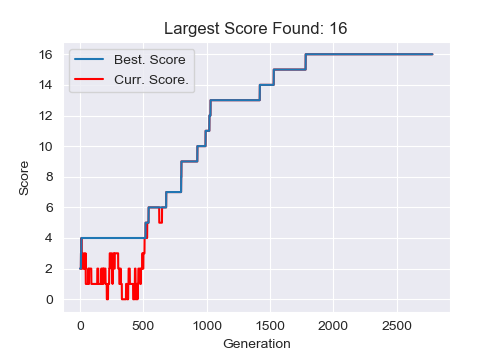

In [112]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


# we can plot the progress of the search for visualization
# plot search convergence
curr = np.array(trajectory)
best = np.array(trajectory_best)
fig = plt.figure(figsize=(5, 3.5))
line_min, = plt.plot(curr[:,0], curr[:,1], label='Curr. Score.',color='red')
line_curr, = plt.plot(best[:,0],best[:,1], label='Best. Score')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.legend(handles=[line_curr, line_min])
plt.title('Largest Score Found: {:d}'.format(int(best_score)));